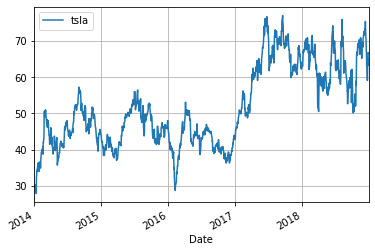

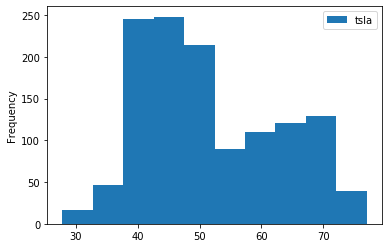

In [1]:
import ffn
import matplotlib.pyplot as plt
import pandas as pd
import time
from ffn.utils import clean_ticker
%matplotlib inline  

target = "TSLA"
name = clean_ticker(target)
portfolio= ffn.get(target,  start = "2014-01-01", end = "2019-01-01")

portfolio.plot(grid = True)
portfolio.plot.hist()

In [2]:
symbol = portfolio["tsla"]
portfolio.sort_values(by='Date', ascending=False, na_position='first')
portfolio["index"] = range(len(portfolio))
portfolio.head(5)

,tsla,index
Date,,
2013-12-31,30.086000,0
2014-01-02,30.020000,1
2014-01-03,29.912001,2
2014-01-06,29.400000,3
2014-01-07,29.872000,4


In [3]:
cols = portfolio.columns.tolist()
Temp = cols[1]
cols[1]=cols[0]
cols[0]=Temp
portfolio = portfolio[cols]
portfolio.head()

,index,tsla
Date,,
2013-12-31,0,30.086000
2014-01-02,1,30.020000
2014-01-03,2,29.912001
2014-01-06,3,29.400000
2014-01-07,4,29.872000


In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

tsla = portfolio["tsla"]
portfolio["z_score"] = ((tsla - np.mean(tsla))/np.std(tsla))
zscore = portfolio["z_score"] 
portfolio.head()

C:\Users\j4a3m\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,tsla,z_score
Date,,,
2013-12-31,0,30.086000,-1.953162
2014-01-02,1,30.020000,-1.959110
2014-01-03,2,29.912001,-1.968845
2014-01-06,3,29.400000,-2.014994
2014-01-07,4,29.872000,-1.972451


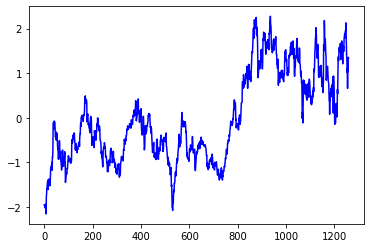

In [5]:
plt.plot(portfolio["index"], zscore, color='b') 

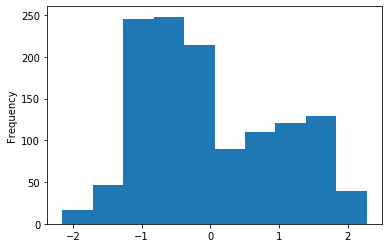

In [6]:
zscore.plot.hist()

In [14]:
zscore_high = 1
zscore_low = 0.5

buy_signal = (zscore <= -(zscore_high))
sell_signal = (zscore >= -(zscore_low))

In [13]:
portfolio.drop(['PV'], axis=1)

,index,tsla,z_score
Date,,,
2013-12-31,0,30.086000,-1.953162
2014-01-02,1,30.020000,-1.959110
2014-01-03,2,29.912001,-1.968845
2014-01-06,3,29.400000,-2.014994
2014-01-07,4,29.872000,-1.972451
2014-01-08,5,30.256001,-1.937839
2014-01-09,6,29.506001,-2.005440
2014-01-10,7,29.143999,-2.038069
2014-01-13,8,27.868000,-2.153081


In [8]:
position = False
portfolio["PV"] = 0.0
turnovers = 0

for i, t in enumerate(portfolio.index):
    
    if not position:   #無持倉狀態為true時
        
        payoff = 0
        portfolio["PV"].iloc[i] = portfolio["PV"].iloc[i - 1] + payoff
        
        if buy_signal[t]:    #如果有買進訊號
            position = True
            turnovers = turnovers + 1
            print(">" * 5, "Create a long position.")
    else:
        
        payoff = portfolio[name].iloc[i] - portfolio[name].iloc[i - 1]     #累積損益
        portfolio["PV"].iloc[i] = portfolio["PV"].iloc[i - 1] + payoff
       
        if sell_signal[t]:                                   #平倉訊號
            position = False
            print("<" * 5, "Close a long position.")
            print("{} -> {:.2f} -> {:.2f}".format(t, portfolio[name][t], portfolio["PV"][t]))

print("Number of turnovers:", turnovers)

C:\Users\j4a3m\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\j4a3m\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\j4a3m\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we lo

>>>>> Create a long position.
<<<<< Close a long position.
2014-02-25 00:00:00 -> 49.60 -> 19.51
>>>>> Create a long position.
<<<<< Close a long position.
2014-06-17 00:00:00 -> 46.33 -> 26.23
>>>>> Create a long position.
<<<<< Close a long position.
2015-04-27 00:00:00 -> 46.31 -> 32.98
>>>>> Create a long position.
<<<<< Close a long position.
2016-03-18 00:00:00 -> 46.55 -> 39.46
>>>>> Create a long position.
<<<<< Close a long position.
2016-07-29 00:00:00 -> 46.96 -> 47.09
>>>>> Create a long position.
<<<<< Close a long position.
2017-01-09 00:00:00 -> 46.26 -> 53.19
Number of turnovers: 6


In [10]:
portfolio["DD of our strategy"] = (portfolio["PV"] - portfolio["PV"].cummax()).cummin()  #cummax=(部位最小值-部位最大值)圖形的最低點(cummin)
dd_idx = portfolio["DD of our strategy"].idxmin()

C:\Users\j4a3m\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
portfolio["buy&hold"] = portfolio[name].diff().cumsum()
portfolio["DD of buy&hold"] = (portfolio["buy&hold"] - portfolio["buy&hold"].cummax()).cummin()
dd_idx2 = portfolio["DD of buy&hold"].idxmin()

C:\Users\j4a3m\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\j4a3m\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


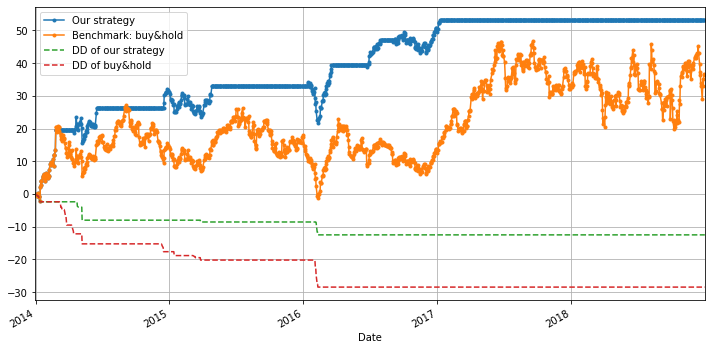

In [13]:
portfolio[["PV", "buy&hold"]].plot(style = ".-", grid = True, figsize = (12, 6))
ax = portfolio["DD of our strategy"].plot(style = "--", grid = True)
ax = portfolio["DD of buy&hold"].plot(style = "--", grid = True)
ax.legend(["Our strategy", "Benchmark: buy&hold", "DD of our strategy", "DD of buy&hold"])